lets first define the fundamental constants and initial stuff I will be using in the problem and also import the needed libraries

In [51]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

m1=1 #pulsar mass in solar masses
m2=0.709036 #Companion mass in solar masses
light_second = sp.constants.speed_of_light
solar_mass = 1.988416e30
grav = sp.constants.gravitational_constant *(1/np.pow(light_second,3))*solar_mass
semi_major_axis = 13.868587422 / 0.920678
reduced_mass = m1*m2 / (m1+m2) 
eccentricity = 0.1344954160
ang_mom = m1*semi_major_axis*(m1+m2)*(1-eccentricity*eccentricity) / (m2*eccentricity)

print("reduced mass: ", reduced_mass)
print("ang_mom:", ang_mom)
print("grav:", grav)

reduced mass:  0.4148748183186311
ang_mom: 265.07698538482475
grav: 4.925506130537767e-06


In [152]:
#convert back to x and y
def convert(r, theta, m1, m2):
    points = len(r)
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(0,points):
        temp = -m2/(m1+m2)*r[i]*np.cos(theta[i])
        x1.append(temp)

        temp = -m2/(m1+m2)*r[i]*np.sin(theta[i])
        y1.append(temp)

        temp = m1/(m1+m2)*r[i]*np.cos(theta[i])
        x2.append(temp)

        temp = m1/(m1+m2)*r[i]*np.sin(theta[i])
        y2.append(temp)
    
    return x1,y1,x2,y2

In [ ]:
def elipse(t,y,m1,m2,G):
    x1,y1,x2,y2,a1,b1,a2,b2 = y

    dydt = [
        a1, #x1-dot = a1
        b1, #y1-dot = b1
        a2, #x2-dot = a2
        b2, #y2-dot = b2
        -G*(m1+m2)*x1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2), #x1-doubled-dot =
        -G*(m1+m2)*y1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2), #y1-double-dot =
        -G*(m1+m2)*x2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2),  #x2-double-dot =
        -G*(m1+m2)*y2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2)   #y2-double-dot =
        
        #-(m1+m2)*x1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2), #x1-doubled-dot =
        #-(m1+m2)*y1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2), #y1-double-dot =
        #(m1+m2)*x2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2),  #x2-double-dot =
        #(m1+m2)*y2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2)   #y2-double-dot =
    ]

    return dydt

m1=25
m2=25.35
r1 = semi_major_axis*(1+eccentricity)
r2 = m1/m2 * r1
theta_dot = (1-eccentricity)/(semi_major_axis*eccentricity*(1+eccentricity))
y0=[
    1, #x1
    0, #y1
    -1, #x2
    0, #y2
    0, #x1-dot
    r1*theta_dot, #y1-dot
    0, #x2-dot
    -r2*theta_dot #y2-dot
    ]
t=np.linspace(0,100,1000)
sol = solve_ivp(elipse,[0,100000],y0,args=(m1,m2,grav),dense_output=True)
my_solution = sol.sol(t)
plt.plot(my_solution[0],my_solution[1])
plt.plot(my_solution[2],my_solution[3])

/tmp/ipykernel_18427/2924856914.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  -G*(m1+m2)*x1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2), #x1-doubled-dot =
/tmp/ipykernel_18427/2924856914.py:10: RuntimeWarning: invalid value encountered in scalar divide
  -G*(m1+m2)*y1 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2), #y1-double-dot =
/tmp/ipykernel_18427/2924856914.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  -G*(m1+m2)*x2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2),  #x2-double-dot =
/tmp/ipykernel_18427/2924856914.py:12: RuntimeWarning: invalid value encountered in scalar divide
  -G*(m1+m2)*y2 / np.pow(np.pow(x1+x2,2) + np.pow(y1+y2,2),3/2)   #y2-double-dot =


KeyboardInterrupt: 

In [80]:
#plt.plot(t,sol[:,3])
x1 = my_solution[0]
y1 = my_solution[1]
x2 = my_solution[2]
y2 = my_solution[3]
x1_dot = my_solution[4]
y1_dot = my_solution[5]
x2_dot = my_solution[6]
y2_dot = my_solution[7]
denominator =np.pow(np.pow(x1[500]+x2[500],2) + np.pow(y1[500]+y2[500],2),3/2)
#print(denominator)
print(my_solution[0])
print(my_solution[4])

[ 1.70894155e+01  1.70887649e+01  1.70868153e+01  1.70835734e+01
  1.70790432e+01  1.70732400e+01  1.70661905e+01  1.70579220e+01
  1.70484630e+01  1.70378428e+01  1.70260918e+01  1.70132412e+01
  1.69993231e+01  1.69843706e+01  1.69684177e+01  1.69514993e+01
  1.69336514e+01  1.69149106e+01  1.68953148e+01  1.68749027e+01
  1.68537137e+01  1.68317885e+01  1.68091684e+01  1.67858945e+01
  1.67619957e+01  1.67374979e+01  1.67124268e+01  1.66868071e+01
  1.66606631e+01  1.66340183e+01  1.66068954e+01  1.65793166e+01
  1.65513032e+01  1.65228759e+01  1.64940548e+01  1.64648591e+01
  1.64353073e+01  1.64054175e+01  1.63752068e+01  1.63446916e+01
  1.63138878e+01  1.62828104e+01  1.62514740e+01  1.62198920e+01
  1.61880776e+01  1.61560430e+01  1.61237998e+01  1.60913589e+01
  1.60587306e+01  1.60259242e+01  1.59929486e+01  1.59598119e+01
  1.59265215e+01  1.58930840e+01  1.58595055e+01  1.58257913e+01
  1.57919459e+01  1.57579732e+01  1.57238765e+01  1.56896582e+01
  1.56553201e+01  1.56208

[ 0.00000000e+00 -1.93136452e-04 -3.86273080e-04 ...  3.88445375e-01
  3.87858839e-01  3.87274247e-01]
[41.19173957 41.19172991 41.19170094 ... 23.22369807 23.26251552
 23.30127319]
(array([-0.00193134, -0.00193135, -0.00193135, ..., -0.00587366,
       -0.00585485, -0.00583615]),)


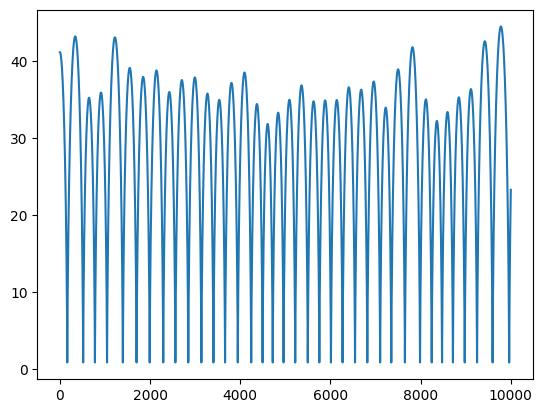

In [57]:
def perfect_ellipse(t,y,L0,reduced_mass,G,m1,m2):
    v, r = y

    return [
        (   np.pow(L0,2) / (  np.pow(reduced_mass,2) * np.pow(r,3)  )   ) - 2*m1*m2/(reduced_mass * np.pow(r,2)), #v-dot = stuff
        v #r-dot = v
    ]

def test(r,L0,reduced_mass,G,m1,m2):
    return (   np.pow(L0,2) / (  np.pow(reduced_mass,2) * np.pow(r,3)  )   ) - 2*m1*m2/(reduced_mass * np.pow(r,2)), #v-dot = stuff


initial_r_dot = 0
initial_r = semi_major_axis*(1+eccentricity)*(m2+m1)/m2
y0 = [initial_r_dot, initial_r]
#y0=[0,10]

ang_mom=1
pure_ellipse_sol = solve_ivp(perfect_ellipse,[0,10000],y0,args=(ang_mom,reduced_mass,grav,m1,m2),dense_output=True)
t_vals = np.linspace(0,10000,100000)
pure_ellipse_motion = pure_ellipse_sol.sol(t_vals)
v_dot_vals = test(pure_ellipse_motion[1],ang_mom,reduced_mass,grav,m1,m2)

print(pure_ellipse_motion[0])
print(pure_ellipse_motion[1])
print(v_dot_vals)
plt.plot(t_vals, pure_ellipse_motion[1])


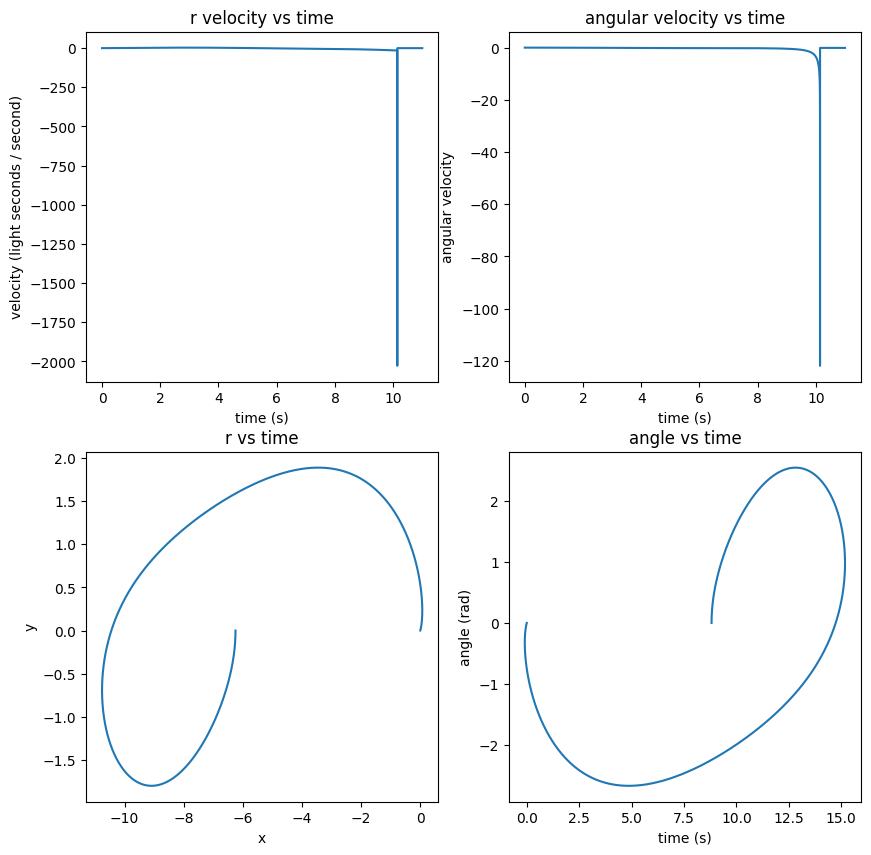

In [153]:
x1, y1, x2, y2 = convert(sol[:,2], sol[:,3],m1,m2)


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("r velocity vs time")
plt.xlabel("time (s)")
plt.ylabel("velocity (light seconds / second)")
plt.plot(t,sol[:,0])

plt.subplot(2,2,2)
plt.title("angular velocity vs time")
plt.xlabel("time (s)")
plt.ylabel("angular velocity")
plt.plot(t,sol[:,1])

plt.subplot(2,2,3)
plt.title("r vs time")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x1,y1)

plt.subplot(2,2,4)
plt.title("angle vs time")
plt.xlabel("time (s)")
plt.ylabel("angle (rad)")
plt.plot(x2,y2)

In [57]:
def temp_map(t,z,a,b,c,d):
    x,y = z
    return [
        a*x - b*x*y,
        -c*y+d*x*y
    ]
sol = solve_ivp(temp_map,[0,15],[10,5],args=(100.5,1,3,1),dense_output=True)

t= np.linspace(0,15,1000)
my_sol = sol.sol(t)
print(my_sol)
#plt.plot(t, my_sol.T)

[[1.00000000e+01 4.15852177e+01 1.57794988e+02 ... 1.73992495e-07
  2.46907679e-07 3.66153799e-07]
 [5.00000000e+00 6.67030390e+00 2.38034526e+01 ... 8.04189282e+01
  7.68769264e+01 7.34908786e+01]]
